In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
zip_path = "Brain_Data_Organised.zip"
extract_dir = "CT_Images/Brain_Data_Organised/Brain_Data_Organised"
normal_dir = os.path.join(extract_dir, "Normal")
stroke_dir = os.path.join(extract_dir, "Stroke")

# Extract ZIP file
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Extracted files to {extract_dir}")
else:
    print(f"Directory already exists: {extract_dir}")

# Debug folder structure
print("Extracted folder structure:")
for root, dirs, files in os.walk(extract_dir):
    print(f"Directory: {root}")
    for dir_name in dirs:
        print(f"  Subdirectory: {dir_name}")
    for file_name in files:
        print(f"  File: {file_name}")

# Verify Normal and Stroke directories
if not os.path.exists(normal_dir):
    print(f"Normal directory not found at: {normal_dir}")
    print("Update 'normal_dir' with the correct path based on the folder structure.")
if not os.path.exists(stroke_dir):
    print(f"Stroke directory not found at: {stroke_dir}")
    print("Update 'stroke_dir' with the correct path based on the folder structure.")

Directory already exists: CT_Images/Brain_Data_Organised/Brain_Data_Organised
Extracted folder structure:
Directory: CT_Images/Brain_Data_Organised/Brain_Data_Organised
  Subdirectory: Normal
  Subdirectory: Stroke
Directory: CT_Images/Brain_Data_Organised/Brain_Data_Organised/Normal
  File: 61 (29).jpg
  File: 53 (1).jpg
  File: 64 (13).jpg
  File: 119 (23).jpg
  File: 101 (6).jpg
  File: 99 (18).jpg
  File: 106 (26).jpg
  File: 103 (3).jpg
  File: 96 (33).jpg
  File: 101 (24).jpg
  File: 59 (27).jpg
  File: 117 (22).jpg
  File: 61 (10).jpg
  File: 112 (24).jpg
  File: 105 (5).jpg
  File: 114 (27).jpg
  File: 111 (32).jpg
  File: 121 (6).jpg
  File: 104 (25).jpg
  File: 95 (5).jpg
  File: 120 (13).jpg
  File: 51 (26).jpg
  File: 115 (22).jpg
  File: 96 (1).jpg
  File: 56 (25).jpg
  File: 56 (11).jpg
  File: 119 (28).jpg
  File: 57 (14).jpg
  File: 129 (29).jpg
  File: 119 (27).jpg
  File: 129 (4).jpg
  File: 54 (2).jpg
  File: 100 (11).jpg
  File: 54 (27).jpg
  File: 109 (7).jpg
  Fil

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.6035 - loss: 0.9918 - val_accuracy: 0.3912 - val_loss: 0.9881
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 249s 4s/step - accuracy: 0.8105 - loss: 0.4005 - val_accuracy: 0.3912 - val_loss: 2.6930
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.8940 - loss: 0.2536 - val_accuracy: 0.3912 - val_loss: 3.7768
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 252s 4s/step - accuracy: 0.9468 - loss: 0.1496 - val_accuracy: 0.3912 - val_loss: 4.6489
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.9606 - loss: 0.1101 - val_accuracy: 0.3912 - val_loss: 5.1854
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.9796 - loss: 0.0671 - val_accuracy: 0.3912 - val_loss: 4.8648
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 270s 4s/step - accuracy: 0.9738 - loss: 0.0795 - val_accuracy: 0.3912 - val_loss: 3.2637
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 255s 4s/step - accuracy: 0.9860 - loss: 0.0529 - val_accuracy: 0.4591 - v

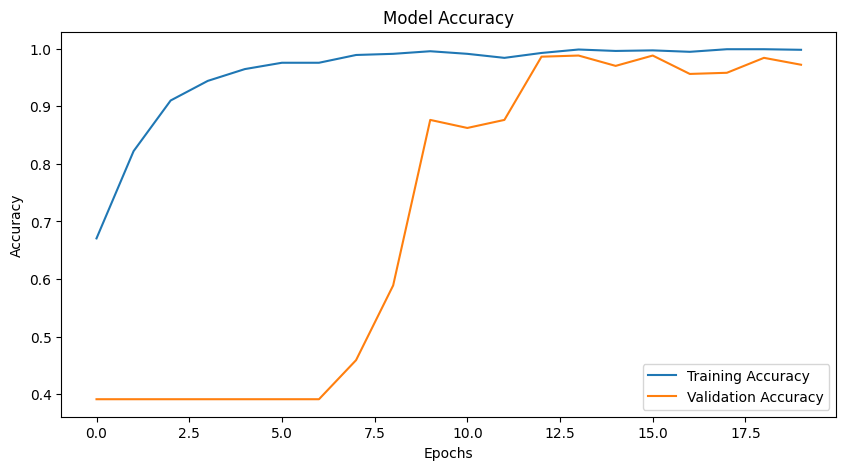

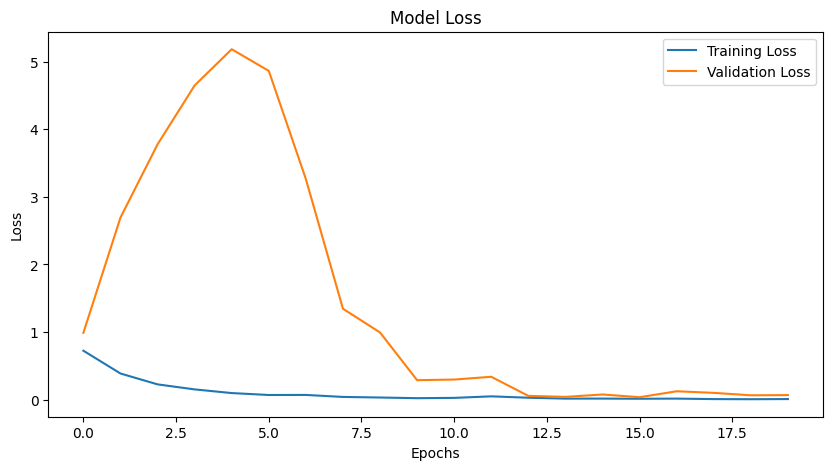

Final Summary:
Validation Loss: 0.06662450730800629
Accuracy: 0.9720559120178223
Precision: 0.9723622566572382
Recall: 0.9720558882235529
F1 Score: 0.9719456717632697


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

image_size = (224, 224)  # Resize all images to 224x224
batch_size = 32

# Step 3: Function to load images and labels
def load_images_and_labels(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load and preprocess the image
            img = tf.keras.preprocessing.image.load_img(file_path, target_size=image_size)
            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)
    return images, labels

# Step 4: Load images and labels
normal_images, normal_labels = load_images_and_labels(normal_dir, 0)  # 0 for Normal
stroke_images, stroke_labels = load_images_and_labels(stroke_dir, 1)  # 1 for Stroke

# Combine data
all_images = np.array(normal_images + stroke_images)
all_labels = np.array(normal_labels + stroke_labels)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Step 6: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(2, activation='softmax')  # Two classes: Normal and Stroke
])

# Step 7: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=batch_size)

# Step 9: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Classification report for detailed metrics
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Step 10: Plot training history with added metrics
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display final summary
print(f"Final Summary:\nValidation Loss: {loss}\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")
